# Source code of UDatE assignment2 (pre-research)

# Read Data

## store.csv

In [1]:
# import numerics libraries
import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm

# import graphics libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth

In [3]:
# define function to read original data
def df_org(file):
    # Open a file
    f = open(file, 'r')

    # Read the data
    df_original = pd.read_csv(f, header=0, sep=',')
    df_original = pd.DataFrame(df_original, dtype='object')

    # Close the file
    f.close()
    return df_original

In [ ]:
# check read store data
df_store_original

In [7]:
# check datatypes in store data
df_store_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   object
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1112 non-null   object
 4   CompetitionOpenSinceMonth  761 non-null    object
 5   CompetitionOpenSinceYear   761 non-null    object
 6   Promo2                     1115 non-null   object
 7   Promo2SinceWeek            571 non-null    object
 8   Promo2SinceYear            571 non-null    object
 9   PromoInterval              571 non-null    object
dtypes: object(10)
memory usage: 87.2+ KB


In [9]:
# count TRUE in "Prom2"
specific_value_count = (df_store_original['Promo2'] == 1).sum() 
print("Count of 1 in 'Promo2':", specific_value_count)

Count of 1 in 'Promo2': 571


In [11]:
# count unique values in original store data
unique_counts = df_store_original['Store'].nunique() 
print("Unique value counts for Store:", unique_counts)

Unique value counts for Store: 1115


In [13]:
# show unique values in each column in store data except "CompetitionDistance"
for column in df_store_original.columns: 
    if column not in ["CompetitionDistance"]:
        unique_values = df_store_original[column].unique() 
        print(f" '{column}' unique values: {unique_values}")

 'Store' unique values: [1 2 3 ... 1113 1114 1115]
 'StoreType' unique values: ['c' 'a' 'd' 'b']
 'Assortment' unique values: ['a' 'c' 'b']
 'CompetitionOpenSinceMonth' unique values: [9.0 11.0 12.0 4.0 10.0 8.0 nan 3.0 6.0 5.0 1.0 2.0 7.0]
 'CompetitionOpenSinceYear' unique values: [2008.0 2007.0 2006.0 2009.0 2015.0 2013.0 2014.0 2000.0 2011.0 nan 2010.0
 2005.0 1999.0 2003.0 2012.0 2004.0 2002.0 1961.0 1995.0 2001.0 1990.0
 1994.0 1900.0 1998.0]
 'Promo2' unique values: [0 1]
 'Promo2SinceWeek' unique values: [nan 13.0 14.0 1.0 45.0 40.0 26.0 22.0 5.0 6.0 10.0 31.0 37.0 9.0 39.0
 27.0 18.0 35.0 23.0 48.0 36.0 50.0 44.0 49.0 28.0]
 'Promo2SinceYear' unique values: [nan 2010.0 2011.0 2012.0 2009.0 2014.0 2015.0 2013.0]
 'PromoInterval' unique values: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


Text(0.5, 1.0, 'Histogram and Kernel Density Estimator for CompetitionDistance')

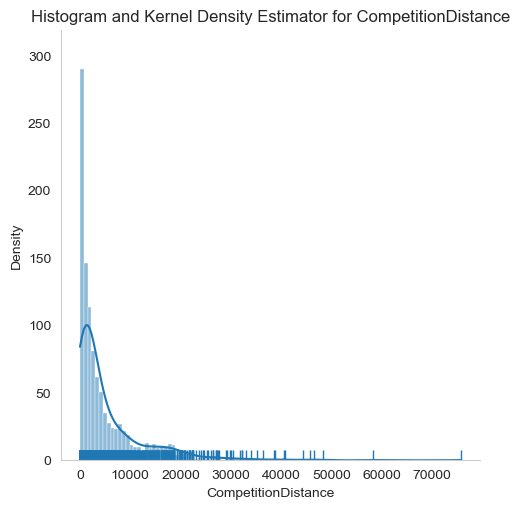

In [15]:
# plot histogram and kde of CompetitionDistance
sns.displot( df_store_original["CompetitionDistance"], kde=True, rug=True, bins=100)
plt.xlabel('CompetitionDistance')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Estimator for CompetitionDistance')

### Preprocess (store) findings
- All Dtype is object: need to be converted
- Multiple columns ("CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear") have null values: need to be filled
- Count of "Promo2" == 1 is 571, hence other Promo2-related columns have no null values
- "Store" is unique
- Need to convert categorical variables to dummies
- 'PromoInterval' has multiple string values in an entry: need to be converted to multiple columns and then dummies
- "CompetitionDistance" is significantly skewed to right: need to assess the outliers and might needs to be transformed
- Any type:date columns should be assessed for its validity, timeliness and format
- Seems no data inconsistency or inaccuracy
- Data reduction could be considered after assessing multicolinearity
- Need to assess consistency of open days

## train.csv

In [9]:
# read original training data into dataframe
df_train_original = df_org("./train.csv")
df_train_original

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\428497064.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1
1017205,1112,2,01/01/2013,0,0,0,0,a,1
1017206,1113,2,01/01/2013,0,0,0,0,a,1
1017207,1114,2,01/01/2013,0,0,0,0,a,1


In [10]:
# show datatypes in training data
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  object
 1   DayOfWeek      1017209 non-null  object
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  object
 4   Customers      1017209 non-null  object
 5   Open           1017209 non-null  object
 6   Promo          1017209 non-null  object
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  object
dtypes: object(9)
memory usage: 69.8+ MB


In [22]:
# show unique values in each column in training data except numeric columns
for column in df_train_original.columns: 
    if column not in ["Date", "Sales", "Customers"]:
        unique_values = df_train_original[column].unique() 
        print(f" '{column}' unique values: {unique_values}")

 'Store' unique values: [1 2 3 ... 1113 1114 1115]
 'DayOfWeek' unique values: [5 4 3 2 1 7 6]
 'Open' unique values: [1 0]
 'Promo' unique values: [1 0]
 'StateHoliday' unique values: ['0' 'a' 'b' 'c' 0]
 'SchoolHoliday' unique values: [1 0]


In [25]:
# count unique values in training dataset
unique_counts = df_train_original['Store'].nunique() 
print("Unique value counts for Store:", unique_counts)

Unique value counts for Store: 1115


Text(0.5, 1.0, 'Histogram and Kernel Density Estimator for Sales')

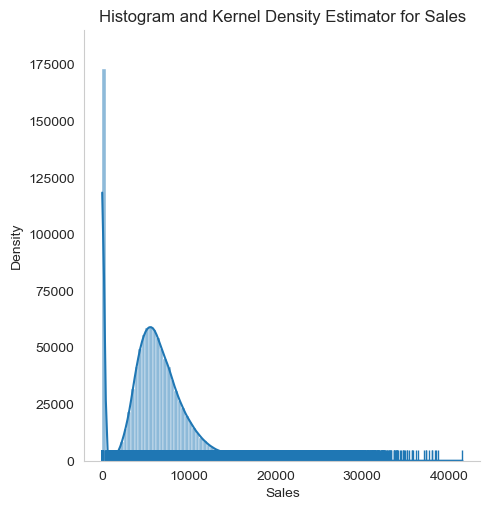

In [27]:
# plot histogram and kde of "Sales" in training dataset
sns.displot( df_train_original["Sales"], kde=True, rug=True, bins=100)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Estimator for Sales')

Text(0.5, 1.0, 'Histogram and Kernel Density Estimator for Customers')

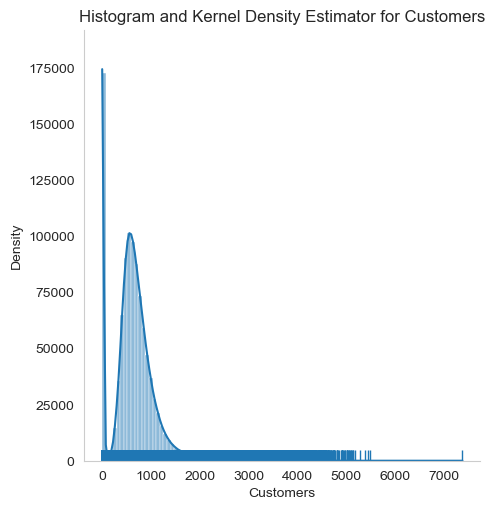

In [28]:
# plot histogram and kde of "Customers" in training dataset
sns.displot( df_train_original["Customers"], kde=True, rug=True, bins=100)
plt.xlabel('Customers')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Estimator for Customers')

In [31]:
# create a new dataframe for date conversion
df_date_train = pd.DataFrame(df_train_original)

# convert datatype of "Date" into datetime
df_date_train["Date"] = pd.to_datetime(df_train_original["Date"], dayfirst=True)

# calculate min and max date values in the dataset
start_date = df_date_train["Date"].min()
end_date = df_date_train["Date"].max()
print("Date range:", start_date, "to", end_date)

# get the range of dates in the dataset
full_date_range = pd.date_range(start=start_date, end=end_date)

# get missing dates in the dataset
missing_dates = full_date_range.difference(df_date_train["Date"])
print("Missing dates:")
print(missing_dates)

Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


### Preprocess (train) findings
- All Dtype is object: need to be converted ("Date": Date, "StateHoliday": string?, "Sales", "Customers" and others: numerics)
- Need to convert categorical variables to dummies
- "Store" is unique
- 'StateHoliday' has multiple string values and a numeric (0): need to clarify what 0 is
- "Sales" and "Customers" are multimodal: need to assess the outliers and might needs to be transformed
- Needs to be combined to store.csv by "Store" column
- "StateHoliday" has '0' and 0: 0 needs to be assessed if it means '0' or not
- Any type:date columns should be assessed for its validity, timeliness and format
- Seems no data inconsistency or inaccuracy
- Data reduction could be considered after assessing multicolinearity
- No missing dates
- Need to assess consistency of open days

## test.csv

In [13]:
# read original testing data into dataframe
df_test_original = df_org("./test.csv")
df_test_original

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


In [15]:
# show datatypes in testing data
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          41088 non-null  object
 1   DayOfWeek      41088 non-null  object
 2   Date           41088 non-null  object
 3   Sales          0 non-null      object
 4   Customers      0 non-null      object
 5   Open           41077 non-null  object
 6   Promo          41088 non-null  object
 7   StateHoliday   41088 non-null  object
 8   SchoolHoliday  41088 non-null  object
dtypes: object(9)
memory usage: 2.8+ MB


In [39]:
# show unique values in each column in testing data except numeric columns
for column in df_train_original.columns: 
    if column not in ["Date", "Sales", "Customers"]:
        unique_values = df_train_original[column].unique() 
        print(f" '{column}' unique values: {unique_values}")

 'Store' unique values: [1 2 3 ... 1113 1114 1115]
 'DayOfWeek' unique values: [5 4 3 2 1 7 6]
 'Open' unique values: [1 0]
 'Promo' unique values: [1 0]
 'StateHoliday' unique values: ['0' 'a' 'b' 'c' 0]
 'SchoolHoliday' unique values: [1 0]


In [40]:
# count unique values in testing dataset
unique_counts = df_store_original['Store'].nunique() 
print("Unique value counts for Store:", unique_counts)

Unique value counts for Store: 1115


In [41]:
# create a new dataframe for date conversion
df_date_test = pd.DataFrame(df_test_original)

# convert datatype of "Date" into datetime
df_date_test["Date"] = pd.to_datetime(df_test_original["Date"], dayfirst=True)

# calculate min and max date values in the dataset
start_date = df_date_test["Date"].min()
end_date = df_date_test["Date"].max()
print("Date range:", start_date, "to", end_date)

# get the range of dates in the dataset
full_date_range = pd.date_range(start=start_date, end=end_date)

# get missing dates in the dataset
missing_dates = full_date_range.difference(df_date_test["Date"])
print("Missing dates:")
print(missing_dates)

Date range: 2015-08-01 00:00:00 to 2015-09-17 00:00:00
Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


### Preprocess (test) findings
- Respose variables is "Sales"
- "Customer" is missing and should be filled the coresponding values in train.csv
- "Store" is unique
- "Open" has multiple null values: need to be filled
- All Dtype is object: need to be converted ("Date": Date, "StateHoliday": string?, others: numerics)
- Need to convert categorical variables to dummies
- Needs to be combined to store.csv by "Store" column
- "StateHoliday" has '0' and 0: 0 needs to be assessed if it means '0' or not
- Any type:date columns should be assessed for its validity, timeliness and format
- Seems no data inconsistency or inaccuracy
- Data reduction could be considered after assessing multicolinearity
- No missing dates
- Need to assess consistency of open days

## Business Problems
- Assessing the effectiveness of promotions
- Assessing the store extension strategy based on the physical distance to competitors
- Assessing seasonality or period

In [17]:
# join training and testing data to store data on unique identifier "Store"
train_df_merged = pd.merge(df_train_original, df_store_original, left_on='Store', right_on='Store', how='left')
test_df_merged = pd.merge(df_test_original, df_store_original, left_on='Store', right_on='Store', how='left')

In [18]:
# check resulting dataset
train_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01/01/2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,01/01/2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,01/01/2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [21]:
# check resulting dataset
test_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Sales vs Competitor Distance vs Promo

C:\Users\teppe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


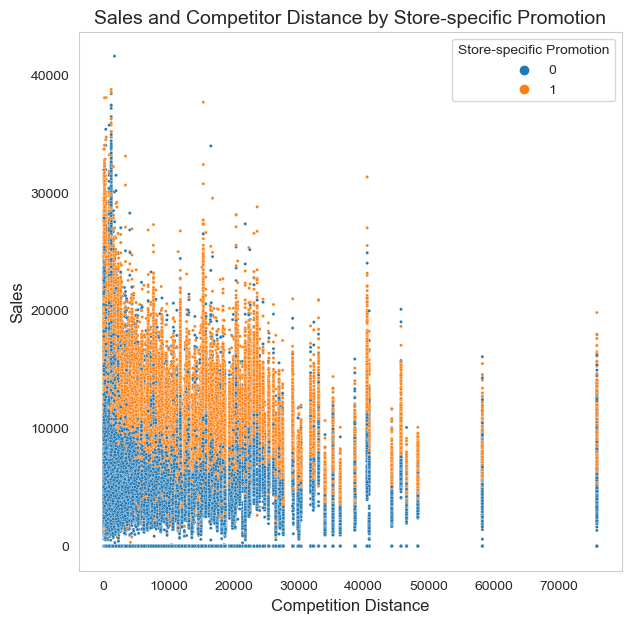

In [93]:
# import seaborn visualization
import seaborn as sb

# plot scatterplots of Sales and CompetitionDistance categorized by Store-specific promotion status
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='CompetitionDistance', y='Sales', data=train_df_merged, hue='Promo', s=5)
ax.set_xlabel("Competition Distance", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Competitor Distance by Store-specific Promotion", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='Store-specific Promotion')
plt.show()

C:\Users\teppe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


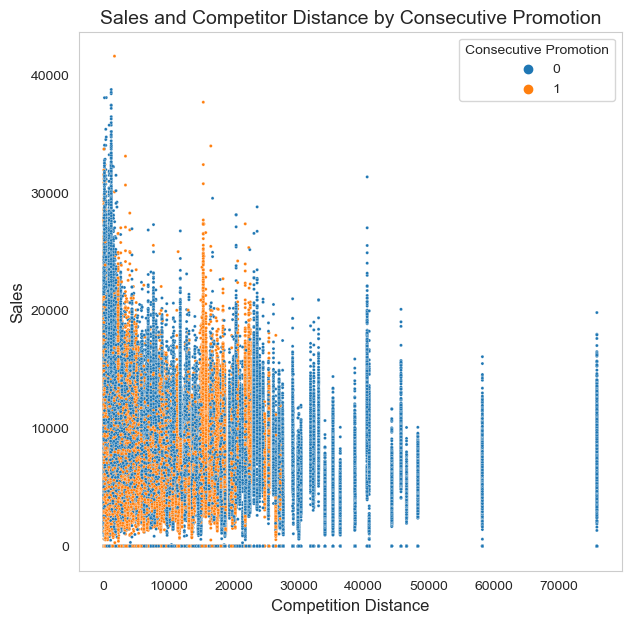

In [91]:
# plot scatterplots of Sales and CompetitionDistance categorized by consecutive promotion status
fig, ax = plt.subplots(figsize=(7, 7))
scatter = sb.scatterplot(ax=ax, x='CompetitionDistance', y='Sales', data=train_df_merged, hue='Promo2', s=5)
ax.set_xlabel("Competition Distance", size=12)
ax.set_ylabel("Sales", size=12)
ax.set_title("Sales and Competitor Distance by Consecutive Promotion", size=14)
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles=handles, title='Consecutive Promotion')
plt.show()

### Sales vs Seasonality

In [23]:
# convert Date in training date into datetime type
train_df_merged['Date'] = pd.to_datetime(train_df_merged["Date"])

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\4008335592.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


In [25]:
# show conversion result
train_df_merged['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 MB


In [21]:
# add three attributes for time periods
train_df_merged_date =  pd.DataFrame(train_df_merged[['Sales', 'Date']])
train_df_merged_date["Year"] = np.nan
train_df_merged_date["Month"] = np.nan
train_df_merged_date["Day"] = np.nan

# convert each time column into datetime type
for index,row in train_df_merged_date.iterrows():
    train_df_merged_date.loc[index, "Year"] = train_df_merged_date.loc[index, "Date"].year
    train_df_merged_date.loc[index, "Month"] = train_df_merged_date.loc[index, "Date"].month
    train_df_merged_date.loc[index, "Day"] = train_df_merged_date.loc[index, "Date"].day

<function matplotlib.pyplot.show(close=None, block=None)>

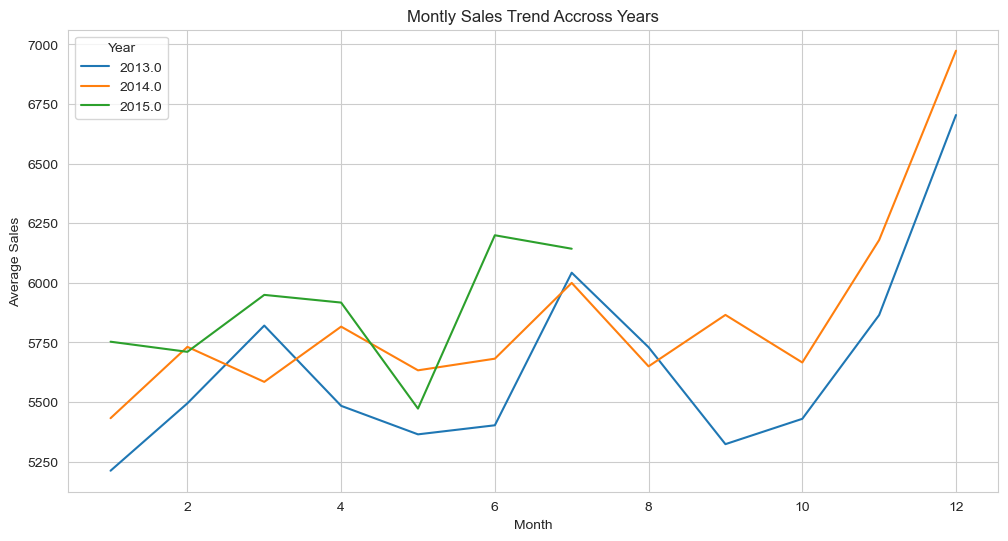

In [28]:
# get monthly sales grouped by year and month
monthly_sales = train_df_merged_date.groupby(['Year', 'Month']).agg({'Sales': 'mean'}).reset_index()

# plot the result
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Sales'], label=str(year))

plt.title('Montly Sales Trend Accross Years')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show

In [31]:
# create csv file of merged training data for future use
train_df_merged_date.to_csv("train_df_merged_date.csv")

In [45]:
# convert Sales to numeric
train_df_merged_date['Sales'] = pd.to_numeric(train_df_merged["Sales"])
train_df_merged_date['Sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Sales
Non-Null Count    Dtype
--------------    -----
1017209 non-null  int64
dtypes: int64(1)
memory usage: 7.8 MB


<function matplotlib.pyplot.show(close=None, block=None)>

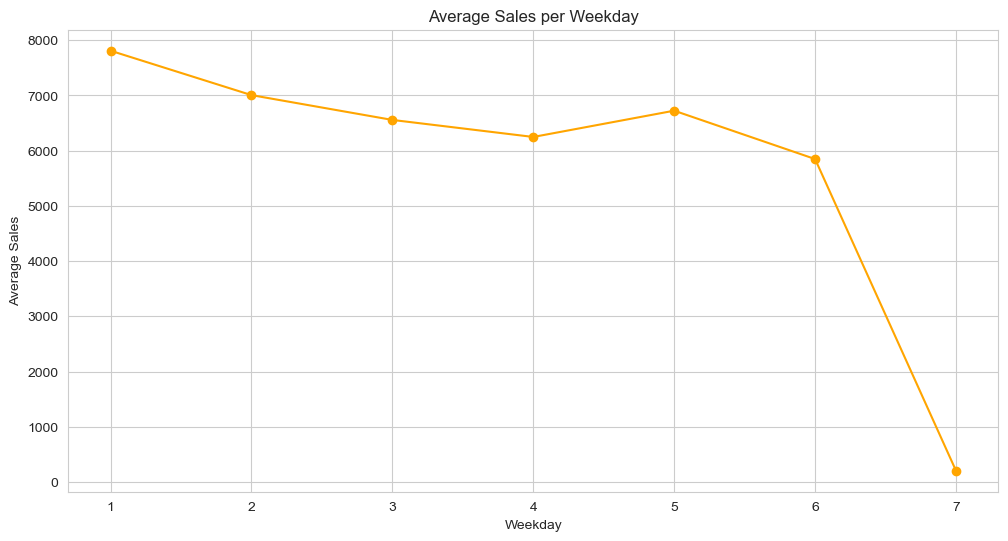

In [59]:
# get mean Sales on each weekday
weekday_sales = train_df_merged.groupby('DayOfWeek')['Sales'].mean().reset_index()
weekday_sales = weekday_sales.sort_values('DayOfWeek')

# plot result 
plt.figure(figsize=(12, 6))
plt.plot(weekday_sales['DayOfWeek'], weekday_sales['Sales'], marker='o', color='orange', linestyle='-')

plt.title('Average Sales per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

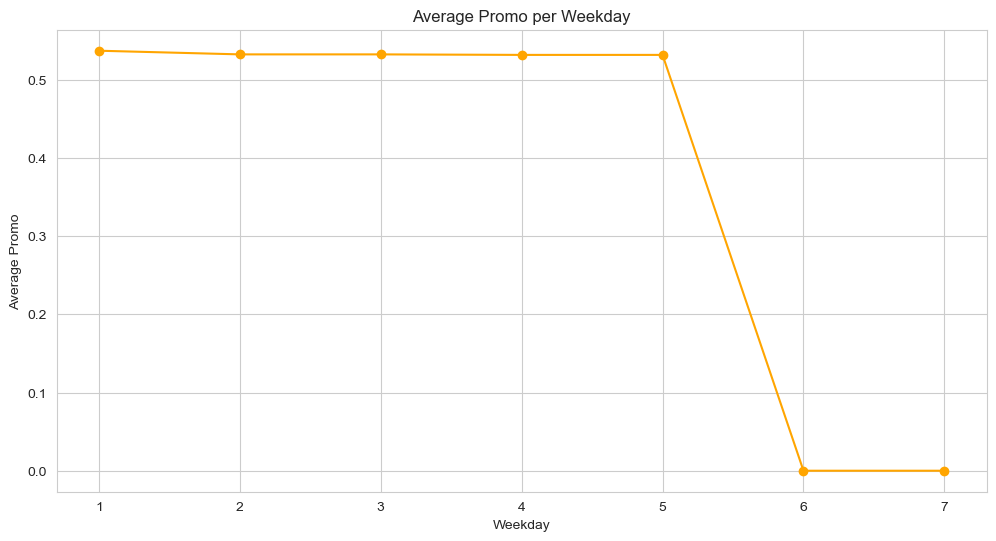

In [67]:
# get mean store-specific promotion counts on each weekday
weekday_sales = train_df_merged.groupby('DayOfWeek')['Promo'].mean().reset_index()
weekday_sales = weekday_sales.sort_values('DayOfWeek')

# plot result
plt.figure(figsize=(12, 6))
plt.plot(weekday_sales['DayOfWeek'], weekday_sales['Promo'], marker='o', color='orange', linestyle='-')

plt.title('Average Promo per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Promo')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

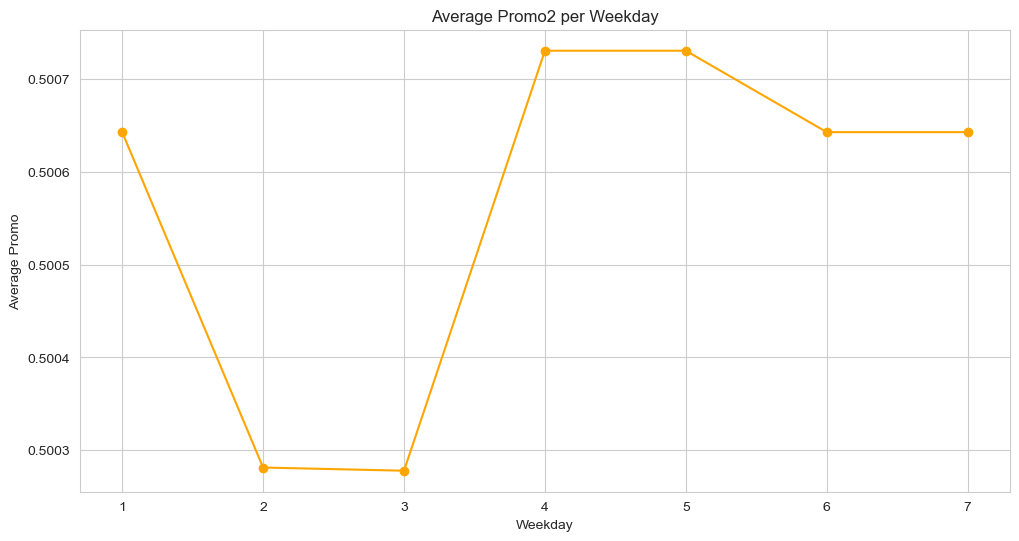

In [99]:
# get mean consecutive promotion counts on each weekday
weekday_sales = train_df_merged.groupby('DayOfWeek')['Promo2'].mean().reset_index()
weekday_sales = weekday_sales.sort_values('DayOfWeek')

# plot result
plt.figure(figsize=(12, 6))
plt.plot(weekday_sales['DayOfWeek'], weekday_sales['Promo2'], marker='o', color='orange', linestyle='-')

plt.title('Average Promo2 per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Promo')
plt.grid(True)
plt.show

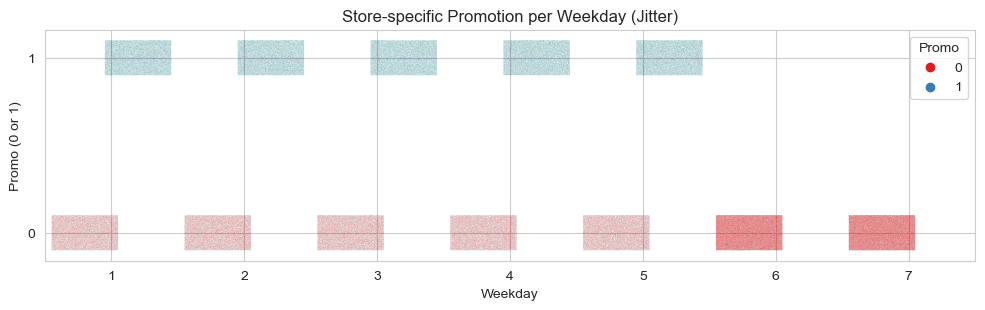

In [130]:
# get jitter value for store-specific promotion
train_df_merged['Promo_jitter'] = train_df_merged['Promo'] + np.random.uniform(-0.1, 0.1, size=len(train_df_merged))

# plot result
plt.figure(figsize=(12, 3))
sb.stripplot(
    x='DayOfWeek', 
    y='Promo_jitter', 
    data=train_df_merged, 
    jitter=0.5,
    dodge=True, 
    alpha=0.7, 
    hue='Promo',
    palette='Set1',
    size=0.1
)

plt.title('Store-specific Promotion per Weekday (Jitter)')
plt.xlabel('Weekday')
plt.ylabel('Promo (0 or 1)')
plt.yticks([0, 1], ['0', '1'])
plt.legend(title='Promo', loc='upper right')
plt.grid(True)
plt.show()

### Store types vs sales

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\78498092.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



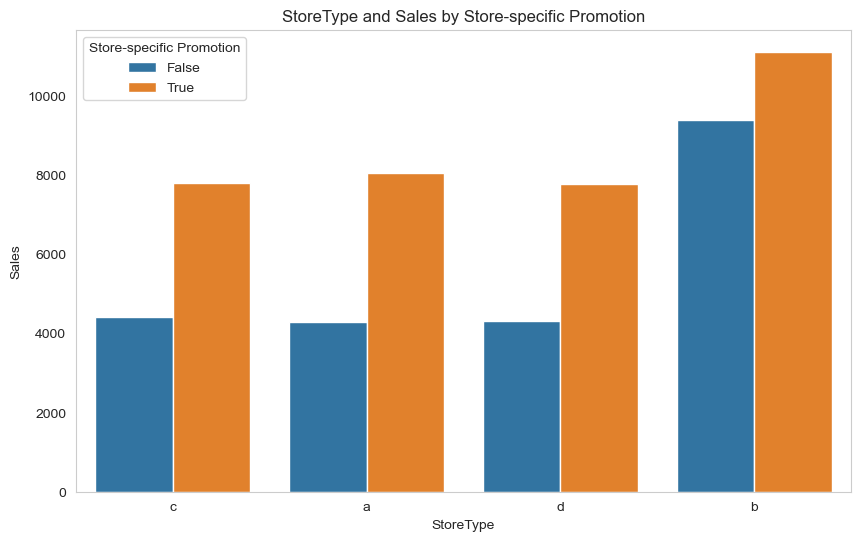

In [95]:
# create a bar plot of storetype by sales, labeled by store-specific promotion status
plt.figure(figsize=(10, 6))

sns.barplot(x='StoreType', y='Sales', data=train_df_merged, ci=None, hue='Promo')

plt.title('StoreType and Sales by Store-specific Promotion')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Store-specific Promotion', labels=['False','True'])
plt.show()

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\4251491614.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



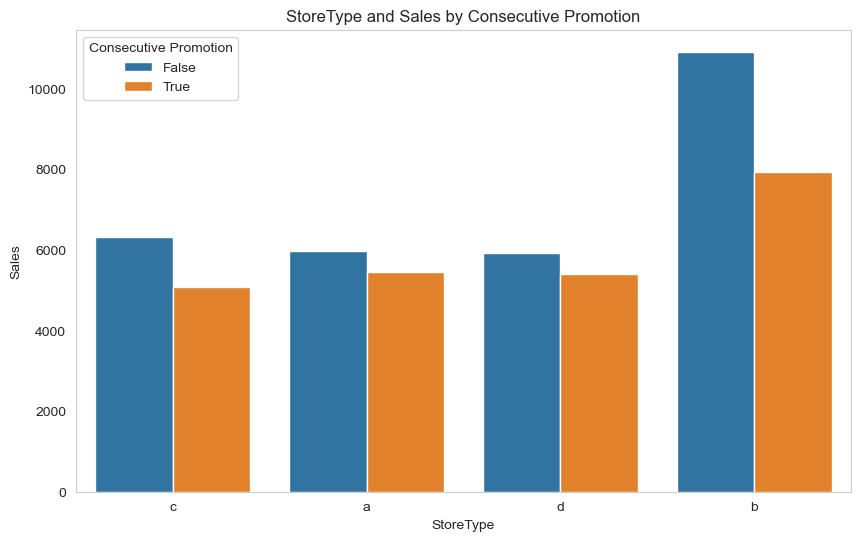

In [97]:
# create a bar plot of storetype by sales, labeled by consecutive promotion status
plt.figure(figsize=(10, 6))

sns.barplot(x='StoreType', y='Sales', data=train_df_merged, ci=None, hue='Promo2')

plt.title('StoreType and Sales by Consecutive Promotion')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Consecutive Promotion', labels=['False','True'])
plt.show()

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\2936116960.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



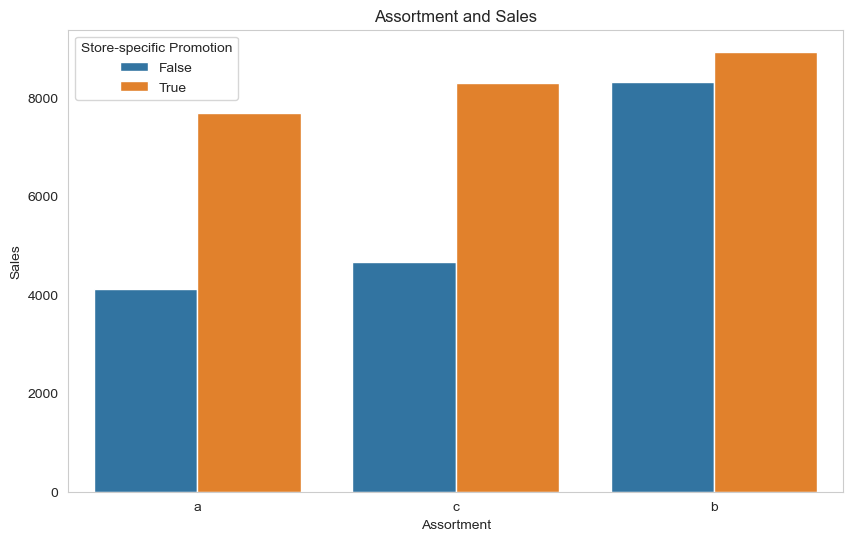

In [70]:
# create a bar plot of assortment by sales, labeled by store-specific promotion status
plt.figure(figsize=(10, 6))

sns.barplot(x='Assortment', y='Sales', data=train_df_merged, ci=None, hue='Promo')

plt.title('Assortment and Sales')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='Store-specific Promotion', labels=['False','True'])
plt.show()

C:\Users\teppe\AppData\Local\Temp\ipykernel_31588\718759671.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



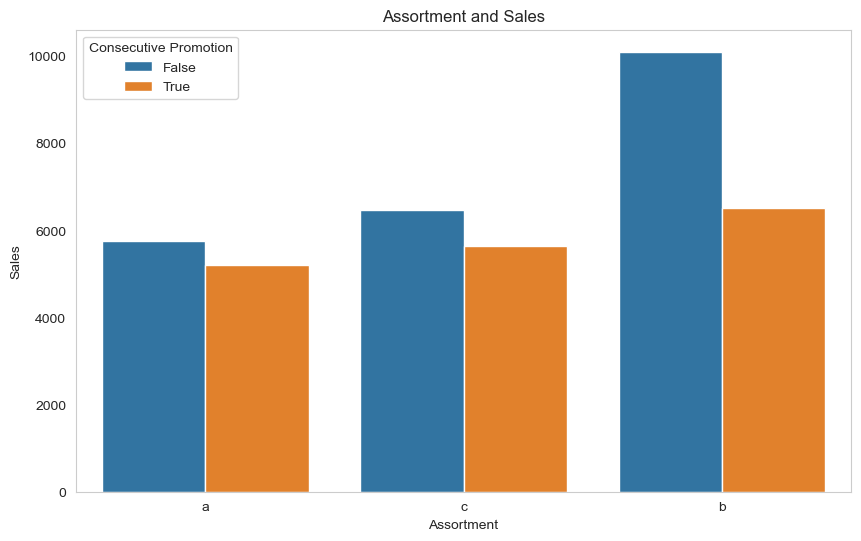

In [72]:
# create a bar plot of assortment by sales, labeled by consecutive promotion status
plt.figure(figsize=(10, 6))

sns.barplot(x='Assortment', y='Sales', data=train_df_merged, ci=None, hue='Promo2')

plt.title('Assortment and Sales')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='Consecutive Promotion', labels=['False','True'])
plt.show()

#EOF